In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load datasets
transactions_df = pd.read_csv('Transactions.csv')
products_df = pd.read_csv('Products.csv')
customers_df = pd.read_csv('Customers.csv')


In [17]:
#merging datasets for analysis
merged_df = transactions_df.merge(products_df, on="ProductID").merge(customers_df, on="CustomerID")


In [19]:
print(merged_df)

    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue  Price_x                      ProductName     Category  \
0        300.68   300.68  ComfortLiving Bluetooth

Category Sales:
 Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


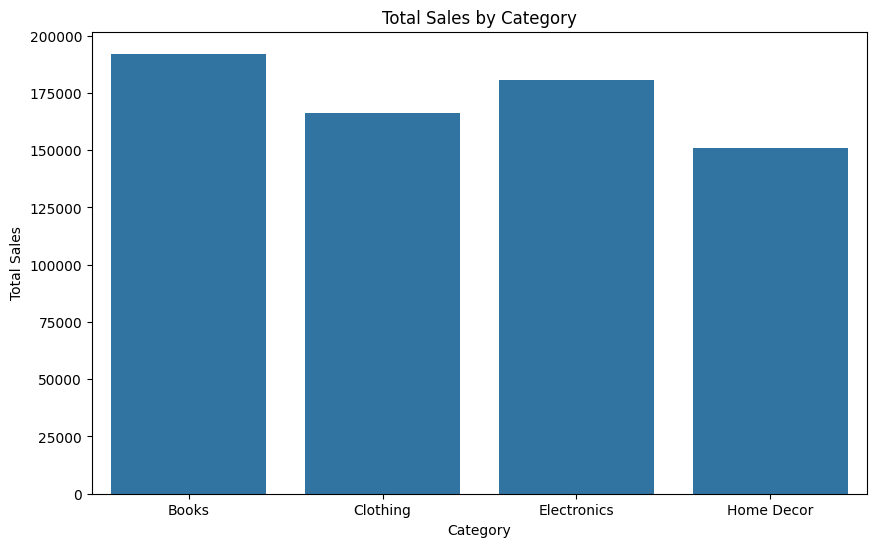

In [27]:
# Total sales per category
category_sales = merged_df.groupby("Category")["TotalValue"].sum()
print("Category Sales:\n", category_sales)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.show()


Regional Sales:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


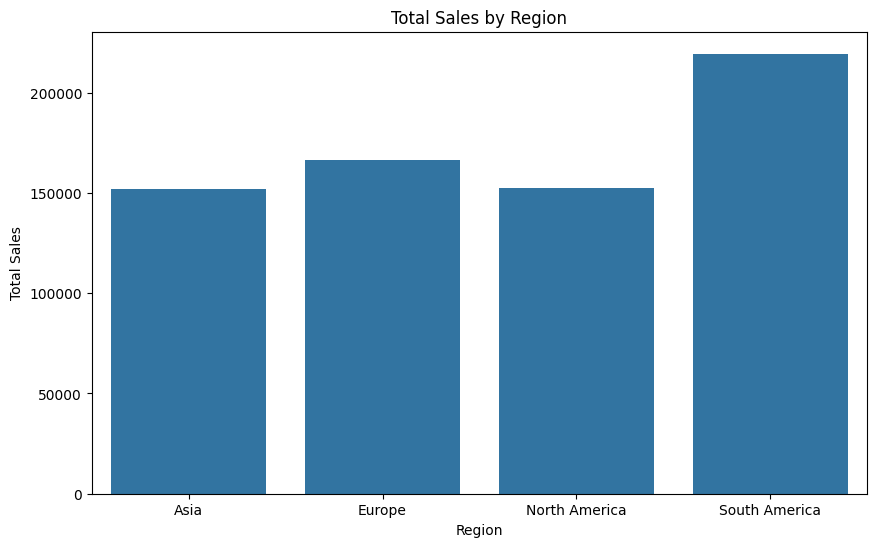

In [26]:
# Total sales by region
region_sales = merged_df.groupby("Region")["TotalValue"].sum()
print("\nRegional Sales:\n", region_sales)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.show()


Top 5 Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


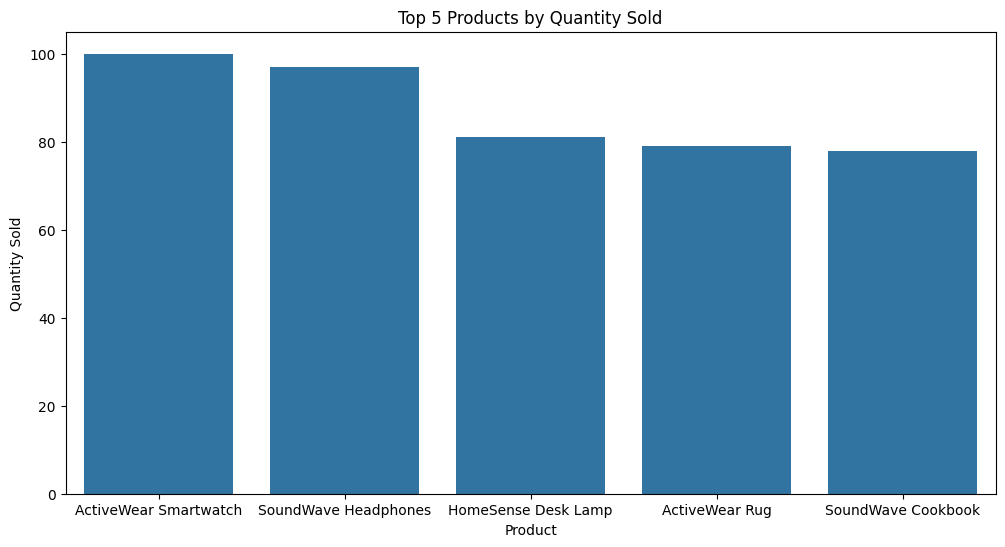

In [25]:
# Top 5 products by quantity sold
popular_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products:\n", popular_products)
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_products.index, y=popular_products.values)
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.title("Top 5 Products by Quantity Sold")
plt.show()

In [28]:
# Monthly sales trends
merged_df['TransactionMonth'] = pd.to_datetime(merged_df['TransactionDate']).dt.to_period('M')
monthly_sales = merged_df.groupby("TransactionMonth")["TotalValue"].sum()
print("\nMonthly Sales Trends:\n", monthly_sales)


Monthly Sales Trends:
 TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


Text(0.5, 1.0, 'Monthly Sales Trends')

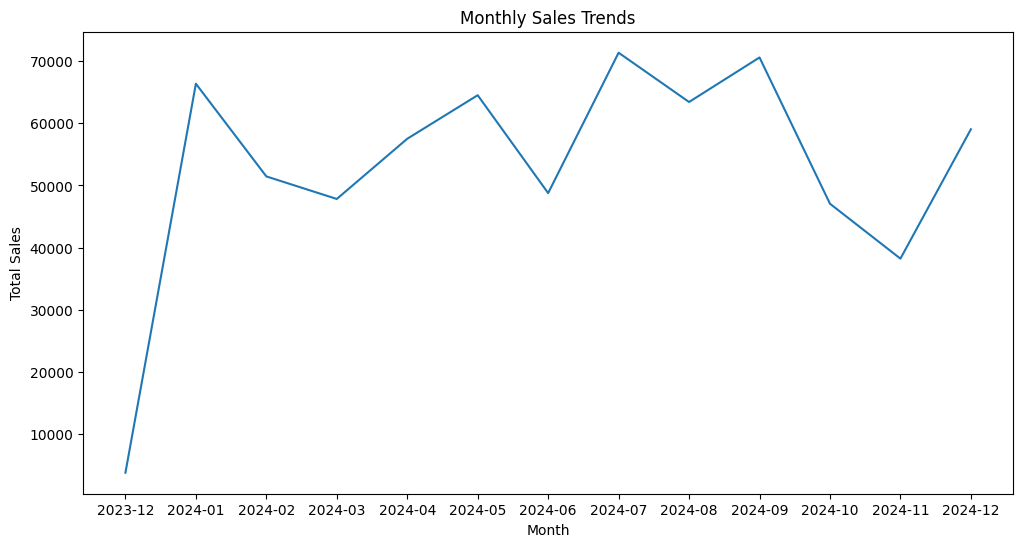

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trends")


Top 5 Customers by Lifetime Value:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


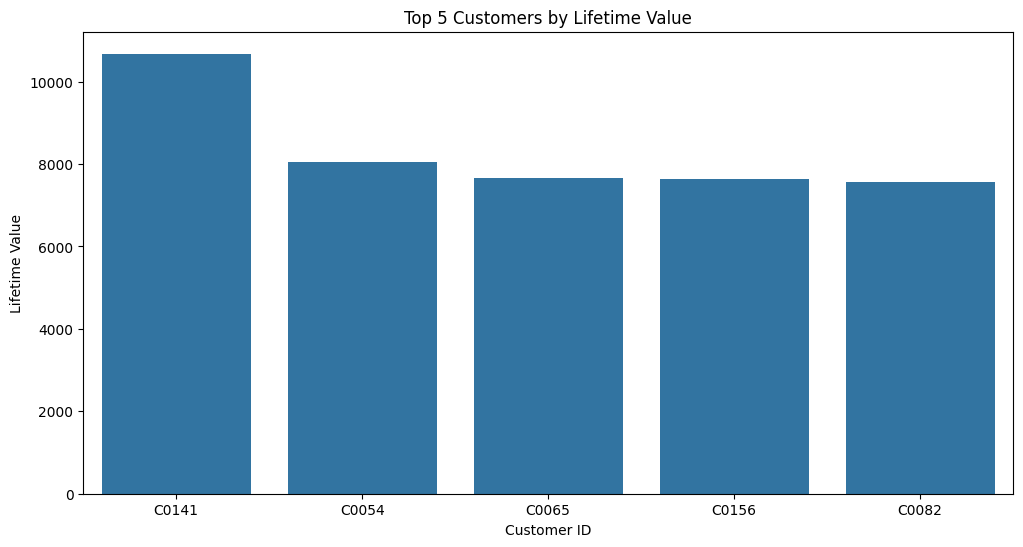

In [31]:
# Top 5 customers by lifetime value
customer_lifetime_value = merged_df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Lifetime Value:\n", customer_lifetime_value)
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_lifetime_value.index, y=customer_lifetime_value.values)
plt.xlabel("Customer ID")
plt.ylabel("Lifetime Value")
plt.title("Top 5 Customers by Lifetime Value")
plt.show()

### Business Insights from EDA
1.Category Sales Performance:
The Books category generates the highest revenue ($192,147), followed by Electronics ($180,784). Home Decor has the lowest sales, indicating a potential area for improvement.

2.Regional Sales Insights:
South America contributes the highest revenue ($219,353), while Asia ranks lowest ($152,075). Expanding marketing in underperforming regions like Asia could drive growth.

3.Product Popularity:
The top-selling product is ActiveWear Smartwatch with 100 units sold, followed by SoundWave Headphones (97 units). This suggests a preference for high-tech products.

4.Seasonal Sales Trends:
Sales peaked in September 2024 ($70,604), with a significant dip in November 2024 ($38,224). Leveraging promotions during slow months could stabilize revenue.

5.Top Customer Insights:
Customer C0141 is the most valuable, contributing over $10,673. Identifying and nurturing such high-value customers can enhance customer retention.

